## Análisis exploratorio y visualización de los datos

En este desafío, los competidores deben predecir la parte del cuerpo a partir de una radiografía.

Debe haber una columna de predicción por imagen, y las etiquetas se representan como números enteros que corresponden cada uno a una parte del cuerpo contenida en el conjunto de datos:

Abdomen = 0

Tobillo = 1

Columna cervical = 2

Tórax = 3

Clavículas = 4

Codo = 5

Pies = 6

Dedos = 7

Antebrazo = 8

Mano = 9

Cadera = 10

Rodilla = 11

Pierna = 12

Columna lumbar = 13

Otros = 14

Pelvis = 15

Hombro = 16

Senos paranasales = 17

Cráneo = 18

Muslo = 19

Columna torácica = 20

Muñeca = 21

*Nota *- Otros indica si la muestra contiene imágenes no radiográficas que a veces se colocan erróneamente en el sistema PACS como radiografías (por ejemplo, esofagograma, densitometría).

#### Train df etiquetado



In [ ]:
train_df_etiquetado = train_df
# Diccionario para mapear 'Target' a 'Zona'
target_to_zone = {
    0: 'Abdomen',
    1: 'Tobillo',
    2: 'Columna cervical',
    3: 'Torax',
    4: 'Claviculas',
    5: 'Codo',
    6: 'Pies',
    7: 'Dedos',
    8: 'Antebrazo',
    9: 'Mano',
    10: 'Cadera',
    11: 'Rodilla',
    12: 'Pierna',
    13: 'Columna lumbar',
    14: 'Otros',
    15: 'Pelvis',
    16: 'Hombro',
    17: 'Senos paranasales',
    18: 'Craneo',
    19: 'Muslo',
    20: 'Columna toracica',
    21: 'Muñeca'
}

train_df_etiquetado['Zona'] = train_df_etiquetado['Target'].map(target_to_zone)
train_df_etiquetado

,SOPInstanceUID,Target,Zona
0,1.2.826.0.1.3680043.8.498.10062189329714053601...,14,Otros
1,1.2.826.0.1.3680043.8.498.53411283183733547704...,3,Torax
2,1.2.826.0.1.3680043.8.498.12955484645689261949...,3,Torax
3,1.2.826.0.1.3680043.8.498.10408703585974384892...,3,Torax
4,1.2.826.0.1.3680043.8.498.30255106562321206269...,9,Mano
...,...,...,...
1273,1.2.826.0.1.3680043.8.498.61418411983294329010...,3,Torax
1274,1.2.826.0.1.3680043.8.498.10229701585590529671...,6,Pies
1275,1.2.826.0.1.3680043.8.498.67348831696239827753...,11,Rodilla
1276,1.2.826.0.1.3680043.8.498.10105498531842222086...,3,Torax


In [ ]:
# Contar cuántas veces aparece cada zona específica
zone_counts = train_df_etiquetado['Zona'].value_counts().rename('Count')

# Crear un DataFrame con la correspondencia de Target a Zona
zone_to_target = pd.DataFrame(list(target_to_zone.items()), columns=['Target', 'Zona'])

# Añadir la columna de conteos al DataFrame
zone_to_target = zone_to_target.merge(zone_counts, on='Zona', how='left')

# Ordenar el DataFrame por 'Count' en orden descendente
zone_to_target = zone_to_target.sort_values(by='Count', ascending=False)

zone_to_target

,Target,Zona,Count
3,3,Torax,579
14,14,Otros,96
11,11,Rodilla,81
0,0,Abdomen,64
2,2,Columna cervical,61
6,6,Pies,56
15,15,Pelvis,53
21,21,Muñeca,50
1,1,Tobillo,32
16,16,Hombro,32


### Visualizador imagenes dicom: ejemplo

In [ ]:
import os
import pydicom
import matplotlib.pyplot as plt
import pandas as pd


# Filtrar para obtener solo imágenes donde la 'Zona' es 'Claviculas'
muslo_df = train_df_etiquetado[train_df_etiquetado['Zona'] == 'Claviculas']

# Lista de UIDs de SOPInstance que pertenecen a 'Muslo'
muslo_uids = muslo_df['SOPInstanceUID'].tolist()

# Filtrar los nombres de archivos DICOM para incluir solo los que están en muslo_uids
dicom_files = [f for f in os.listdir(train_images_path) if f[:-4] in muslo_uids]

# Crear una figura para mostrar las imágenes
fig, axes = plt.subplots(nrows=(len(dicom_files) + 2) // 3, ncols=3, figsize=(15, 5 * ((len(dicom_files) + 2) // 3)))
fig.suptitle('Claviculas', fontsize=16)

for i, file in enumerate(dicom_files):
    # Cargar el archivo DICOM
    dicom_path = os.path.join(train_images_path, file)
    dicom_image = pydicom.dcmread(dicom_path)

    # Extraer la matriz de datos de la imagen
    image_data = dicom_image.pixel_array

    # Obtener el subplot correspondiente
    ax = axes[i // 3, i % 3]

    # Mostrar la imagen en el subplot
    ax.imshow(image_data, cmap='gray')
    ax.axis('off')  # No mostrar los ejes

    # Obtener el UID de SOPInstance del nombre del archivo, suponiendo que el nombre del archivo sea el UID
    uid = file[:-4]  # Asumiendo que la extensión es de cuatro caracteres como '.dcm'

    # Obtener el índice en train_df_etiquetado para este UID
    index = muslo_df[muslo_df['SOPInstanceUID'] == uid].index[0]

    # Establecer el título usando el índice en el DataFrame
    ax.set_title(f'Index: {index}')

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.subplots_adjust(top=0.88)  # Ajusta para el título de la figura
plt.show()


### Macroanálisis metadatos

In [ ]:
# Ejemplo del macroanalisis de metadatos
import pydicom
import os

def generate_bits_stored(directory):
    # Generador que itera sobre cada archivo DICOM en el directorio
    for filename in os.listdir(directory):
        if filename.endswith('.dcm'):
            filepath = os.path.join(directory, filename)
            try:
                ds = pydicom.dcmread(filepath, stop_before_pixels=True)  # leer solo metadatos
                bits_stored = ds.get('StudyDescription', None)
                yield bits_stored
            except Exception as e:
                print(f"Error al procesar {filename}: {e}")

def count_bits_stored(directory):
    bits_stored_counts = {}
    for bits_stored in generate_bits_stored(directory):
        if bits_stored is not None:
            if bits_stored in bits_stored_counts:
                bits_stored_counts[bits_stored] += 1
            else:
                bits_stored_counts[bits_stored] = 1
    return bits_stored_counts

# Ruta al directorio de los archivos DICOM
dicom_directory = train_images_path
# Ejecutar el conteo
bits_stored_distribution = count_bits_stored(dicom_directory)
print(bits_stored_distribution)


{'XRAY': 1278}


Tras el análisis sacamos muy pocas cosas relevantes, las que más son estas caracteristicas que nos sirven para una conversión posterior más precisa:

{15: 312, 10: 3, 8: 13} bits en test

{15: 1215, 8: 43, 12: 2, 10: 18} bits en train


Photometric Interpretation:

{'MONOCHROME1': 1215, 'MONOCHROME2': 63} en train

{'MONOCHROME1': 312, 'MONOCHROME2': 16} en test

Rescale Slope:

{'1.0': 1223} en train
{'1.0': 314} en test

Rescale Intercept:

{'0.0': 1223} en train
{'0.0': 314} en test

Pixel Spacing:

{('0.1', '0.1'): 1221, ('0.297', '0.297'): 16} en train

{('0.1', '0.1'): 314, ('0.297', '0.297'): 3} en test


## Depuración y limpieza dataset de entrenamiento

Ejemplo: conservador.csv

In [ ]:
import pandas as pd

import pandas as pd

# Suponemos que train_df ya está cargado con tus datos de CSV
# Si necesitas cargarlo desde un archivo CSV, puedes descomentar la siguiente línea y ajustar la ruta del archivo
train_df = pd.read_csv("train.csv", header=0)

# Diccionario de reasignación de índices a nuevos targets
new_targets = {
    8: 14,
    460: 6,
    664: 14,
    785: 1,
    1033: 1,
    1058: 14,
    1064: 0
}


# Actualizar los targets según el diccionario
for idx, target in new_targets.items():
    train_df.loc[train_df.index == idx, 'Target'] = target

# Eliminar la fila según el índice que hemos acordado

#train_df = train_df.drop(index=[1278,1279,1280,1281])

# Opcional: Si deseas guardar los cambios en un nuevo archivo CSV
train_df.to_csv('conservador.csv', index=False)

print("Cambios aplicados y fila eliminada correctamente.")


Cambios aplicados y fila eliminada correctamente.


## Conversión dicom files: V1 y V4

### Conversión V1: JPG

In [ ]:
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.1 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
import pydicom
import cv2


# Función para redimensionar y normalizar una imagen
def preprocess_image(img):
   # Redimensionar la imagen para que tenga un tamaño de 512x512 píxeles
   resized_img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)

   # Normalizar la imagen
   normalized_img = cv2.normalize(resized_img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

   return normalized_img


# Ruta a la carpeta de imágenes de entrada en tu drive
input_folder = '/content/drive/MyDrive/PACOTINAIKOS/train'


# Crear una carpeta para las imágenes normalizadas
output_folder = '/content/drive/MyDrive/PACOTINAIKOS/train_jpg'
os.makedirs(output_folder, exist_ok=True)


# Iterar sobre los archivos en la carpeta de entrada
for filename in os.listdir(input_folder):
   if filename.endswith('.dcm'):
       try:
           # Leer el archivo DICOM
           ds = pydicom.dcmread(os.path.join(input_folder, filename))

           # Obtener la matriz de píxeles y convertirla a un formato adecuado para OpenCV
           img = ds.pixel_array.astype(float)

           # Preprocesar la imagen (redimensionar y normalizar)
           processed_img = preprocess_image(img)


           # Guardar la imagen procesada en la carpeta de salida
           output_filename = os.path.splitext(filename)[0] + '.jpg'
           cv2.imwrite(os.path.join(output_folder, output_filename), (processed_img * 255).astype('uint8'))


           # Imprimir el progreso
           print(f"Imagen procesada: {filename}")
       except Exception as e:
           print(f"Error al procesar la imagen '{filename}': {e}")


print("Proceso completado.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/pydicom/pixel_data_handlers/pillow_handler.py:238: UserWarning: The (0028,0101) 'Bits Stored' value (15-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  warnings.warn(


Imagen procesada: 1.2.826.0.1.3680043.8.498.12321430148353134437369943500506682108.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12336783553322800699204939523033613595.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12349604547773643462854508062317787086.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12355108642790545710246052931293142272.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12363067424206260737821416500039285243.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12366921122742247131136641333230414665.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12378044708302094802825659742455534986.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12378966170925018112620661711511431734.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12395533389810358564188611171775634980.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12401076608067423677279984756638353389.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498.12414243101975237693704262413365291546.dcm
Imagen procesada: 1.2.826.0.1.3680043.8.498

### Conversión V4: PNG 16 bits

Tras el analisis de los metadatos, y ver que no eran relevantes, decido aplicar el pipeline de preprocesado a una conversion a PNG (16 bits) donde pueda guardar toda la informacion posible de los JPEG 2000 de las dicom, sin perdida. No uso JPEG porque png es mas generico y compatible para el modelado posterior.

El resizing se ha intentado con PIL BICUBIC pero se ha complicado, al final nos conformamos con cv2 CUBIC. Maximizando la calidad e informacion que podamos percibir de las imagenes (contando con que PIL no hemos podido).

En el caso de las imagenes que tienen 8 bits, las reajustamos a 8 bits, para evitar introducir ruido excesivo en las imagenes.

In [ ]:
import pydicom
import numpy as np
from PIL import Image
import cv2
import os
from joblib import Parallel, delayed

def resize_with_padding(img, desired_size=(256, 256)):
    old_size = img.shape[:2]  # old_size is in (height, width) format

    # Determine whether to scale up or scale down
    is_upscaling = old_size[0] < desired_size[0] or old_size[1] < desired_size[1]

    # Choose interpolation method based on whether you are upscaling or downscaling
    if is_upscaling:
        interp_method = cv2.INTER_CUBIC  # Better for enlarging
    else:
        interp_method = cv2.INTER_AREA   # Better for reducing size

    # Calculate new size to maintain aspect ratio
    ratio = float(desired_size[0]) / max(old_size)
    new_size = tuple([int(x * ratio) for x in old_size])

    # Resize the image
    img = cv2.resize(img, (new_size[1], new_size[0]), interpolation=interp_method)

    # Calculate padding to reach the desired size
    delta_w = desired_size[1] - new_size[1]
    delta_h = desired_size[0] - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    color = [0, 0, 0]  # Color of padding, change if necessary

    # Add padding to the resized image
    new_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)

    return new_img

def window_image(img, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    img = np.clip(img, img_min, img_max)
    return (img - img_min) / (img_max - img_min)

def convert_dicom_to_png(input_path, output_path):
    ds = pydicom.dcmread(input_path)
    img = ds.pixel_array.astype(float)

    # Apply windowing if metadata available
    if 'WindowCenter' in ds and 'WindowWidth' in ds:
        img = window_image(img, ds.WindowCenter, ds.WindowWidth)

    # Normalize the image
    img /= img.max()

    # Convert Monochrome1 to Monochrome2
    if ds.PhotometricInterpretation == 'MONOCHROME1':
        img = 1 - img

    # Special processing for images with Bits Allocated = 8 and Photometric Interpretation = MONOCHROME2
    if ds.BitsAllocated == 8 and ds.PhotometricInterpretation == 'MONOCHROME2':
        img = resize_with_padding(img)

        # Apply Gaussian filter to reduce noise
        img = cv2.GaussianBlur(img, (5, 5), 0)

        # Convert to 8-bit PNG
        img = (img * 255).astype(np.uint8)
        img_pil = Image.fromarray(img, mode='L')
    else:
        # Resize and padding
        img = resize_with_padding(img)

        # Convert to 16-bit PNG
        img = (img * 65535).astype(np.uint16)
        img_pil = Image.fromarray(img, mode='I;16')

    img_pil.save(output_path)

def process_images(input_folder, output_folder):
    input_files = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith('.dcm')]
    output_files = [os.path.join(output_folder, f.replace('.dcm', '.png')) for f in os.listdir(input_folder) if f.endswith('.dcm')]
    existing_files = {os.path.basename(f) for f in os.listdir(output_folder)}

    files_to_process = [(input_files[i], output_files[i]) for i in range(len(input_files)) if os.path.basename(output_files[i]) not in existing_files]

    Parallel(n_jobs=-1)(delayed(process_single_image)(f[0], f[1]) for f in files_to_process)

def process_single_image(input_path, output_path):
    try:
        convert_dicom_to_png(input_path, output_path)
        print(f"Imagen procesada y guardada: {output_path}")
    except Exception as e:
        print(f"Error al procesar {input_path}: {e}")

# Example usage
input_folder = '/content/drive/My Drive/PACOTINAIKOS/train'
output_folder = '/content/drive/My Drive/PACOTINAIKOS/V4/train'
os.makedirs(output_folder, exist_ok=True)
process_images(input_folder, output_folder)



## Stratified split

In [ ]:
from sklearn.model_selection import train_test_split

# Paso 2: Dividir datos en conjuntos de entrenamiento y validación usando stratified splitting
train_images = train_df['image_path']
train_labels = train_df['Target']

# Stratified split to ensure class distribution is maintained in both train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, stratify=train_labels)


## Split con nuestro propio set de validacion: validacion_df

In [ ]:
# Muestras seleccionadas para validacion_df
validation_df = train_df.loc[[416,877,997,1197,581,1224,640,826,705,831,611,1154,1054,1115,1249,837,76,911,717,527,641,467,106,22,690,909,1216,586,56,26,458,261,64,112,863,725,73,589,180,208,1151,52,6,547,1272,165,418,435,1133,120,43,1127,1246,1270,806,746,632,146,53,30,212,127,95,17]]


In [ ]:
# Paso 1: Cargar y preprocesar datos
train_df = pd.read_csv("conservador.csv", header=0)
test_df = pd.read_csv("sample_submission.csv", header=0)
validacion_df= pd.read_csv("validacion.csv", header=0)

In [ ]:
# Eliminamos las filas de validacion_df de train
train_df = train_df.drop(index=[416, 877, 997, 1197, 581, 1224, 640, 826, 705, 831, 611, 1154, 1054, 1115, 1249, 837, 76, 911, 717, 527, 641, 467, 106, 22, 690, 909, 1216, 586, 56, 26, 458, 261, 64, 112, 863, 725, 73, 589, 180, 208, 1151, 52, 6, 547, 1272, 165, 418, 435, 1133, 120, 43, 1127, 1246, 1270, 806, 746, 632, 146, 53])


Ahora añadimos unas pocas filas aleatorias a validacion_df para evaluar sobre una muestra más grande.

In [ ]:
# Definir X_train e y_train desde train_df
X_train = [preprocess_image(image_path, (256, 256)) for image_path in train_df['image_path']]
y_train = train_df['Target']

# Definir X_val e y_val desde validacion_df
X_val = [preprocess_image(image_path, (256, 256)) for image_path in validacion_df['image_path']]
y_val = validacion_df['Target']

from sklearn.model_selection import train_test_split
import numpy as np

# Realizar un nuevo split del 10% del conjunto de entrenamiento para validación
X_train_split, X_additional_val, y_train_split, y_additional_val = train_test_split(X_train, y_train, test_size=0.1,stratify=y_train, random_state=42)

# Convertir listas de imágenes en arrays de numpy si no lo están ya
X_train_split = np.array(X_train_split)
X_additional_val = np.array(X_additional_val)
X_val = np.array(X_val)
y_val = np.array(y_val)

# Combinar los nuevos datos de validación con el conjunto de validación existente
X_val_combined = np.concatenate((X_val, X_additional_val), axis=0)
y_val_combined = np.concatenate((y_val, y_additional_val), axis=0)

# Ahora X_train_split y y_train_split serán tus nuevos conjuntos de entrenamiento
# Y X_val_combined y y_val_combined serán tus conjuntos de validación ampliados

print(f"New training set size: {len(X_train_split)}")
print(f"New validation set size: {len(X_val_combined)}")

# Actualizar las variables para usar los conjuntos actualizados
X_train = X_train_split
y_train = y_train_split
X_val = X_val_combined
y_val = y_val_combined


X_train:
0       /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
1       /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
2       /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
3       /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
4       /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
                              ...                        
1273    /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
1274    /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
1275    /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
1276    /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
1277    /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
Name: image_path, Length: 1219, dtype: object
y_train:
0       14
1        3
2        3
3        3
4        9
        ..
1273     3
1274     6
1275    11
1276     3
1277    11
Name: Target, Length: 1219, dtype: int64
X_val:
0     /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
1     /content/drive/MyDrive/PACOTINAIKOS/V4/train/1...
2     /content/dr

## Carga de imágenes y Data Aumentation

### Imagenes V1

In [ ]:
# Función de preprocesamiento para V1
def preprocess_image(image_path, target_size=(256, 256)):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: No se pudo cargar la imagen {image_path}")
        return None
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalización
    return img

# Paso 3: Crear generadores de datos para aumentar el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow(np.array(X_train), y_train, batch_size=32)

### Imagenes V4

In [ ]:
from PIL import Image
import numpy as np

def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((299, 299), Image.BILINEAR)  # Resize the image to MODEL OPTIMUM
    img = np.array(img, dtype=np.uint16)  # Convertir a array de numpy manteniendo 16 bits
    #img = img / 65535  # Normalización al rango [0, 1]
    img = img / 65535 * 2 - 1  # Normalización al rango [-1, 1]
    img = np.stack((img,)*3, axis=-1)  # Replicar el canal para tener 3 canales
    return img

# Usar esta función para preparar tus datos de entrenamiento y validación
X_train = np.array([load_image(path) for path in X_train])
X_val = np.array([load_image(path) for path in X_val])



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def rotate_90_degrees(image):
    """Randomly rotate the image by 0 or 90 degrees."""
    k = np.random.choice([0, 1])
    return np.rot90(image, k)

def custom_preprocessing(image):
    """Apply the custom preprocessing including rotation."""
    image = rotate_90_degrees(image)
    return image

# Data augmentation for training
train_datagen = ImageDataGenerator(
    preprocessing_function=custom_preprocessing,
    width_shift_range=0.2,  # Horizontal translations
    height_shift_range=0.2,  # Vertical translations
    fill_mode='nearest'  # Filling strategy for newly created pixels
)

# Validation data generator without augmentation
val_datagen = ImageDataGenerator()

# Assuming X_train, y_train, X_val, y_val are already defined and preprocessed
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)



## InceptionV3

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Modelo
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Congelar las primeras capas del modelo base y permitir el ajuste de las últimas
for layer in base_model.layers[:249]:
    layer.trainable = False
for layer in base_model.layers[249:]:
    layer.trainable = True

# Añadir capas adicionales al modelo con Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)  # Añadir dropout con una tasa del 20%
predictions = Dense(22, activation='softmax')(x)  # Ajusta según el número de clases

# Compilar el modelo
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0007), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback para ajustar dinámicamente el learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-7, verbose=1)

# Callback para guardar el mejor modelo según la pérdida de validación
checkpoint_callback = ModelCheckpoint(filepath='inceptionV3.h5',
                                      monitor='val_loss',
                                      save_best_only=True,
                                      verbose=1)


In [ ]:
model.fit(train_generator,
          epochs=20,
          validation_data=(np.array(X_val), y_val),
          callbacks=[reduce_lr_callback, checkpoint_callback])



## Xception

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

# Cargar el modelo base preentrenado Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Congelar las primeras capas del modelo base y permitir el ajuste de las últimas
for layer in base_model.layers[:116]:
    layer.trainable = False
for layer in base_model.layers[116:]:
    layer.trainable = True

# Añadir capas adicionales al modelo con Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)  # Añadir dropout con una tasa del 20%
predictions = Dense(22, activation='softmax')(x)  # Ajusta según el número de clases

# Compilar el modelo
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.0002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compilar el modelo
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00007), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback para ajustar dinámicamente el learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=2.9999999242136255e-05, verbose=1)

# Callback para guardar el mejor modelo según la pérdida de validación
checkpoint = ModelCheckpoint('mejor_modelo_v4.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


83683744/83683744 [==============================] - 5s 0us/step


In [ ]:
history = model.fit(train_generator, epochs=40, validation_data=val_generator, callbacks=[checkpoint])


### Re-entreno

In [ ]:
# Combinar los conjuntos de entrenamiento y validación
X_full_train = np.concatenate((X_train_v4, X_val_v4), axis=0)
y_full_train = np.concatenate((y_train, y_val), axis=0)

print(f"Full training set size: {len(X_full_train)}")


Full training set size: 1278


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Supongamos que ya tienes el mejor modelo guardado
best_model = load_model('mejor_modelo_v4.keras')


# Recompilar el modelo con un learning rate más bajo
best_model.compile(optimizer=Adam(learning_rate=0.00007), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)  # Monitorea la pérdida de entrenamiento
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-6)

# Reentrenar el modelo con el conjunto de datos combinado
history = best_model.fit(
    X_full_train,
    y_full_train,
    epochs=10,  # Ajusta el número de épocas según sea necesario
    callbacks=[early_stopping, lr_scheduler]
)

# Guardar el modelo reentrenado
best_model.save('xception.h5')


## Nasnet

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Modelo base NASNetLarge
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

# Congelar las primeras capas del modelo base y permitir el ajuste de las últimas
for layer in base_model.layers[:-250]:
    layer.trainable = False
for layer in base_model.layers[-250:]:
    layer.trainable = True

# Añadir capas adicionales al modelo con Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)
predictions = Dense(22, activation='softmax')(x)  # Ajusta según el número de clases

# Compilar el modelo
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback para ajustar dinámicamente el learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=1e-6, verbose=1)

# Callback para guardar el mejor modelo según la pérdida de validación
checkpoint = ModelCheckpoint('mejor_modelo_v4.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)



In [ ]:
history = model.fit(train_generator, epochs=40, validation_data=val_generator, callbacks=[checkpoint])


### Re-entreno

In [ ]:
# Combinar los conjuntos de entrenamiento y validación
X_full_train = np.concatenate((X_train_v4, X_val_v4), axis=0)
y_full_train = np.concatenate((y_train, y_val), axis=0)

print(f"Full training set size: {len(X_full_train)}")


Full training set size: 1278


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Supongamos que ya tienes el mejor modelo guardado
#best_model = load_model('mejor_modelo_v4.keras')


# Recompilar el modelo con un learning rate más bajo
best_model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)  # Monitorea la pérdida de entrenamiento
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-6)

# Reentrenar el modelo con el conjunto de datos combinado
history = best_model.fit(
    X_full_train,
    y_full_train,
    epochs=10,  # Ajusta el número de épocas según sea necesario
    callbacks=[early_stopping, lr_scheduler]
)

# Guardar el modelo reentrenado
best_model.save('nasnetlarge.h5')


40/40 [==============================] - 72s 586ms/step - loss: 3.7419e-04 - accuracy: 1.0000 - lr: 1.0000e-05


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## MobilenetV2

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Modelo base MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las primeras capas del modelo base y permitir el ajuste de las últimas
for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True

# Añadir capas adicionales al modelo con Dropout
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.4)(x)  # Ajuste la tasa de dropout a 0.5
predictions = Dense(22, activation='softmax')(x)  # Ajusta según el número de clases

# Compilar el modelo
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00007), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callback para ajustar dinámicamente el learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=2.9999999242136255e-05, verbose=1)

# Callback para guardar el mejor modelo según la pérdida de validación
checkpoint = ModelCheckpoint('mejor_modelo_v4.keras', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


9406464/9406464 [==============================] - 2s 0us/step


In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=val_generator, callbacks=[checkpoint])


### Re-entreno

In [ ]:
# Combinar los conjuntos de entrenamiento y validación
X_full_train = np.concatenate((X_train_v4, X_val_v4), axis=0)
y_full_train = np.concatenate((y_train, y_val), axis=0)

print(f"Full training set size: {len(X_full_train)}")


Full training set size: 1278


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Supongamos que ya tienes el mejor modelo guardado
best_model = load_model('mejor_modelo_v4.keras')


# Recompilar el modelo con un learning rate más bajo
best_model.compile(optimizer=Adam(learning_rate=0.00007), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)  # Monitorea la pérdida de entrenamiento
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-6)

# Reentrenar el modelo con el conjunto de datos combinado
history = best_model.fit(
    X_full_train,
    y_full_train,
    epochs=10,  # Ajusta el número de épocas según sea necesario
    callbacks=[early_stopping, lr_scheduler]
)

# Guardar el modelo reentrenado
best_model.save('mobilenet.h5')


## DenseNet201

In [ ]:
# Modelo
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Congelar las primeras capas del modelo base y permitir el ajuste de las últimas
for layer in base_model.layers[:600]:
    layer.trainable = False
for layer in base_model.layers[600:]:
    layer.trainable = True

# Añadir capas adicionales al modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(22, activation='softmax')(x)  # Ajusta según el número de clases

# Compilar el modelo
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=0.00002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Definir el callback de ModelCheckpoint
checkpoint = ModelCheckpoint('mejor_modelo_v2.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
# Entrenar el modelo con el callback
history = model.fit(train_generator, epochs=80, validation_data=val_generator, callbacks=[checkpoint])

### Re-entreno

In [ ]:
# Combinar los conjuntos de entrenamiento y validación
X_full_train = np.concatenate((X_train_v4, X_val_v4), axis=0)
y_full_train = np.concatenate((y_train, y_val), axis=0)

print(f"Full training set size: {len(X_full_train)}")


Full training set size: 1278


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Supongamos que ya tienes el mejor modelo guardado
best_model = load_model('mejor_modelo_v4.keras')


# Recompilar el modelo con un learning rate más bajo
best_model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Definir callbacks
early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)  # Monitorea la pérdida de entrenamiento
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=5, min_lr=1e-6)

# Reentrenar el modelo con el conjunto de datos combinado
history = best_model.fit(
    X_full_train,
    y_full_train,
    epochs=10,  # Ajusta el número de épocas según sea necesario
    callbacks=[early_stopping, lr_scheduler]
)

# Guardar el modelo reentrenado
best_model.save('densenet201.h5')


## Validacion de resultados de los modelos

In [ ]:
# Asume que model es tu modelo entrenado y X_test son tus datos de prueba.
# Load the best model from the checkpoint
from tensorflow.keras.models import load_model

model = load_model('best_model.keras')
predictions = model.predict(np.array(X_val))
predicted_classes = np.round(predictions).astype(int)


9/9 [==============================] - 5s 263ms/step


In [ ]:
predictions = model.predict(np.array(X_val))
predicted_classes = np.round(predictions).astype(int).flatten()

9/9 [==============================] - 2s 256ms/step


In [ ]:
# Asumiendo que y_test es un array de etiquetas verdaderas
true_classes = np.array(y_val)
incorrect_indices = np.where(predicted_classes != true_classes)


In [ ]:
true_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
incorrect_indices

(array([193, 200]),)

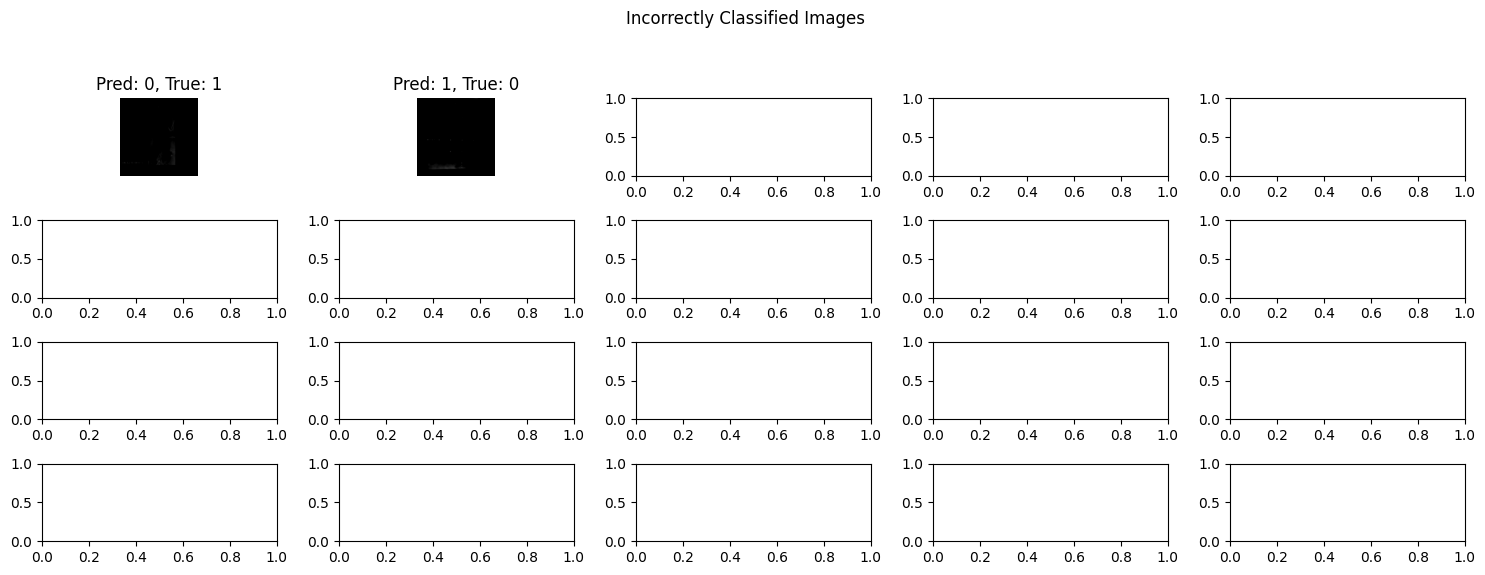

In [ ]:
import matplotlib.pyplot as plt

# Asumiendo que num_images_to_show se define de acuerdo a la disponibilidad de datos incorrectos
num_images_to_show = min(17, len(incorrect_indices))

# Configura el subplot
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 6))
fig.suptitle('Incorrectly Classified Images')

for i in range(num_images_to_show):
    ax = axes[i // 5, i % 5]
    incorrect_index = incorrect_indices[i]

    # Verificar que el índice incorrecto está dentro de los rangos adecuados
    if incorrect_index < len(X_val) and incorrect_index < len(predicted_classes) and incorrect_index < len(true_classes):
        img = X_val[incorrect_index]  # Acceder a la imagen
        ax.imshow(img)
        pred_class = predicted_classes[incorrect_index]
        true_class = true_classes[incorrect_index]
        ax.set_title(f"Pred: {pred_class}, True: {true_class}")
        ax.axis('off')
    else:
        print(f"Índice {incorrect_index} está fuera de rango para X_val o las clases.")
        continue  # Saltar este índice si está fuera de rango

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<Axes: >

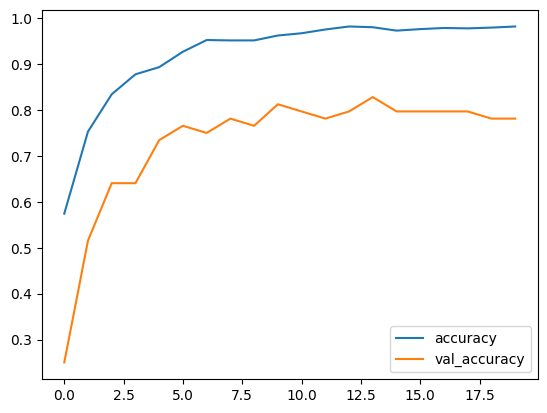

In [ ]:
import json
with open('history.json', 'w') as f:
    json.dump(str(history.history), f)

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

<Axes: >

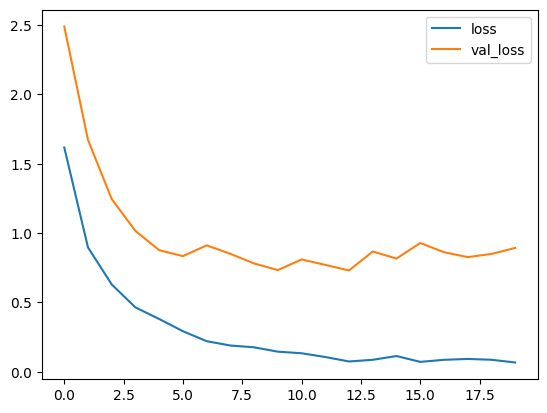

In [ ]:

history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

## Ensemble

In [ ]:
# Define a function to resize images
def resize_images(images, target_size):
    resized_images = []
    for img in images:
        resized_img = tf.image.resize(img, target_size).numpy()
        resized_images.append(resized_img)
    return np.array(resized_images)


In [ ]:
# Función para cargar y procesar las imágenes
def load_image(image_path):
    img = Image.open(image_path)
    img = img.resize((255, 255), Image.BILINEAR)  # Resize the image to MODEL OPTIMUM
    img = np.array(img, dtype=np.uint16)  # Convertir a array de numpy manteniendo 16 bits
    #img = img / 65535  # Normalización al rango [0, 1]
    img = img / 65535 * 2 - 1  # Normalización al rango [-1, 1]
    img = np.stack((img,)*3, axis=-1)  # Replicar el canal para tener 3 canales
    return img

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved models
model1 = load_model('xception_929.h5')
model2 = load_model('efficientnetb0_902.h5')
model3 = load_model('resnet152v2_932.h5')
model4 = load_model('nasnetlarge_899.h5')
model5 = load_model('nasnetmobile_88.h5')
model6 = load_model('inceptionV3_914.h5')
model7 = load_model('vgg19_884.h5')
model8 = load_model('mobilenet_942.h5')
model9 = load_model('densenet201_939.h5')
model10 = load_model('densenet121_935.h5')






In [ ]:
# este modelo fue entrenado con V1, en su caso usaremos imagenes V1 para lanzar las predicciones en el ensemble
model20 = load_model('inceptionV3.h5')
test_images_model20 = resize_images(test_images, (256, 256))  # Assuming model3 expects 224x224
pred20 = model20.predict(test_images_model20)

11/11 [==============================] - 3s 94ms/step


In [ ]:
# Paso 5: Evaluar el modelo
test_images = np.array([load_image(path) for path in test_df['image_path']])
test_labels = test_df['Target']

# Resize test images to match the input shape of each model
test_images_model1 = resize_images(test_images, (299, 299))  # Assuming model1 expects 224x224
test_images_model2 = resize_images(test_images, (224, 224))  # Assuming model2 expects 299x299
test_images_model3 = resize_images(test_images, (224, 224))  # Assuming model3 expects 224x224
test_images_model4 = resize_images(test_images, (331, 331))  # Assuming model3 expects 224x224
test_images_model5 = resize_images(test_images, (224, 224))  # Assuming model3 expects 224x224
test_images_model6 = resize_images(test_images, (256, 256))  # Assuming model3 expects 224x224
test_images_model7 = resize_images(test_images, (224, 224))  # Assuming model3 expects 224x224
test_images_model8 = resize_images(test_images, (224, 224))  # Assuming model3 expects 224x224
test_images_model9 = resize_images(test_images, (256, 256))  # Assuming model3 expects 224x224
test_images_model10 = resize_images(test_images, (256, 256))  # Assuming model3 expects 224x224



In [ ]:
# Make predictions
pred1 = model1.predict(test_images_model1)
pred2 = model2.predict(test_images_model2)
pred3 = model3.predict(test_images_model3)
pred4 = model4.predict(test_images_model4)
pred5 = model5.predict(test_images_model5)
pred6 = model6.predict(test_images_model6)
pred7 = model7.predict(test_images_model7)
pred8 = model8.predict(test_images_model8)
pred9 = model9.predict(test_images_model9)
pred10 = model10.predict(test_images_model10)


11/11 [==============================] - 3s 109ms/step


#### Votacion por media

In [ ]:
# Averaging the predictions
ensemble_pred_val = (pred1 + pred4 + pred8 + pred9 + pred20) / 5

# If your task is classification, take the argmax to get the final class predictions
ensemble_pred_val_class = np.argmax(ensemble_pred_val, axis=1)

print("Predicciones finales del ensemble (promedio de predicciones):", ensemble_pred_val_class)


Predicciones finales del ensemble (promedio de predicciones): [ 3 11 11  2  3  3  3  4  6  8  0  3 21  3  3  3  3  0  3  7  9  3 20  5
 14 21  0  3 21 17  3  3  3  3  3  3  6 17  3  1  3  0 15  3 18 16 15 13
  3  3  3  2 16 13  3  8  3  3  3  6  3 20  3  1  3  3  0 18  3  3 14  3
  3 15 15  3  3  3  3 11  3  3  6  3 14  3 11  3  6 11 14  3  3  3  3 13
 15  9 13  3  3  4 14  3 11  3  3  0 21  6 14  2  3  2  3  3 10 11  3  3
 14  2  3  3  3  3  3  9 13 15  5 14  3  3 12  3  1  3 13  2  0  3  3  1
 11 11 15 12 14  8  5 14 11  2 12 14 16  3  3  3 14  3  2  3  0 10 11 11
 14  3  9 14 15  3  3  3 14  2 15 11  3  9  3  3  3  1  3 16 14  3 11 18
  2  3  3  2  3 21 11  8  3  9  3  3 10 21 14  3 21  3  3  2  6  3  6  3
  9  3  3 21  3  6  3  3  3  3  3  3  2  3  3 21  3  3  3 15  0  0  3 17
  6 14  1 14  3  3 14 21 15  3 16  3  3  3 21 10 20  1  0 14 16  7  3  3
 21  3  3  9  3  6  3 11  3  3  3  3  3  3 11 21  3  3  1  2 15  3  3  0
  3 15  3 14 11 15 14 19 12  3  3 21  2 11 17  0 15  0  3  3  

#### Votacion por mayoria

In [ ]:
import numpy as np
from scipy import stats

# Supongamos que tienes las predicciones de los modelos en un array
# Cada fila representa una muestra y cada columna una predicción de un modelo
# Aquí, 'predicciones' es una lista de arrays con las predicciones de cada modelo
predicciones = np.array([pred1, pred4, pred8, pred9, pred20, pred7])

#predicciones = np.array([pred1, pred2, pred3, pred4, pred5, pred6, pred7, pred8])

# Transponer para tener las predicciones de cada muestra en filas
predicciones = np.transpose(predicciones, (1, 0, 2))

# Convertir las probabilidades en etiquetas, si es necesario
predicciones_clases = np.argmax(predicciones, axis=-1)

# Votación mayoritaria
ensemble_pred_class, counts = stats.mode(predicciones_clases, axis=1)

# La moda se devuelve como un array de 2D, seleccionamos el primer elemento de cada fila
ensemble_pred_class = ensemble_pred_class.flatten()
counts = counts.flatten()

# Para almacenar los índices de los empates y las clases empatadas
indices_empates = []
clases_empates = []

# Manejo de empates
for i, count in enumerate(counts):
    clase_moda = ensemble_pred_class[i]
    ocurrencias_clase_moda = np.sum(predicciones_clases[i] == clase_moda)

    if ocurrencias_clase_moda != count:
        # Si hay empate
        clases_unicas, ocurrencias = np.unique(predicciones_clases[i], return_counts=True)
        clases_con_max_ocurrencias = clases_unicas[ocurrencias == np.max(ocurrencias)]

        # Almacenar índice y clases empatadas
        indices_empates.append(i)
        clases_empates.append(clases_con_max_ocurrencias)

        # Seleccionar aleatoriamente entre las clases empatadas
        ensemble_pred_class[i] = np.random.choice(clases_con_max_ocurrencias)

print("Predicciones finales del ensemble (votación por moda con manejo de empates):", ensemble_pred_class)

# Mostrar los índices y las clases con empates
print("Índices con empates:", indices_empates)
print("Clases empatadas en cada índice:", clases_empates)


Predicciones finales del ensemble (votación por moda con manejo de empates): [ 3 11 11  2  3  3  3  4  6  8  0  3 21  3  3  3  3  0  3  7  9  3 20  5
 14 21  0  3 21 17  3  3  3  3  3  3  6 17  3  1  3  0 15  3 18 16 15 13
  3  3  3  2 16 13  3  8  3  3  3  6  3 20  3  1  3  3  0 18  3  3 14  3
  3 15  0  3  3  3  3 11  3  3  6  3 14  3 11  3  6 11 14  3  3  3  3 13
 15  9 13  3  3  4 14  3 11  3  3  0 21  6 14  2  3  2  3  3 10 11  3  3
 14  2  2  3  3  3  3  9 13 15  5 14  3  3 12  3  1  3 13  2  0  3  3  1
 11 11 15 12 14 12  5 14 11  2 12 14 16  3  3  3 14  3  2  3  0 10 11 11
 14  3  9 14 15  3  3  3 14  2 15 11  3  9  3  3  3  1  3 16 14  3 11 18
  2  3  3  2  3 21 11  8  3  9  3  3 10  1 14  3 21  3  3  2  6  3  6  3
  9  3  3 21  3  6  3  3  3  3  3  3  2  3  3 21  3  3  3 15  0  0  3 17
  6 14  1 14  0  3 14 21 15  3 16  3  3  3 21 10 20  1  0 14 16  7  3  3
 21  3  3  9  3  6  3 11  3  3  3  3  3  3 11 21  3  3  1  2 15  3  3  0
  3 15  3 14 11  3 14 19  8  3  3 21  2 11 17  

#### METRICAS FINALES Y VISUALIZACIONES

¿Son iguales las predicciones por moda y por promedio? False
Índices con predicciones diferentes: [ 74 122 149 205 314]


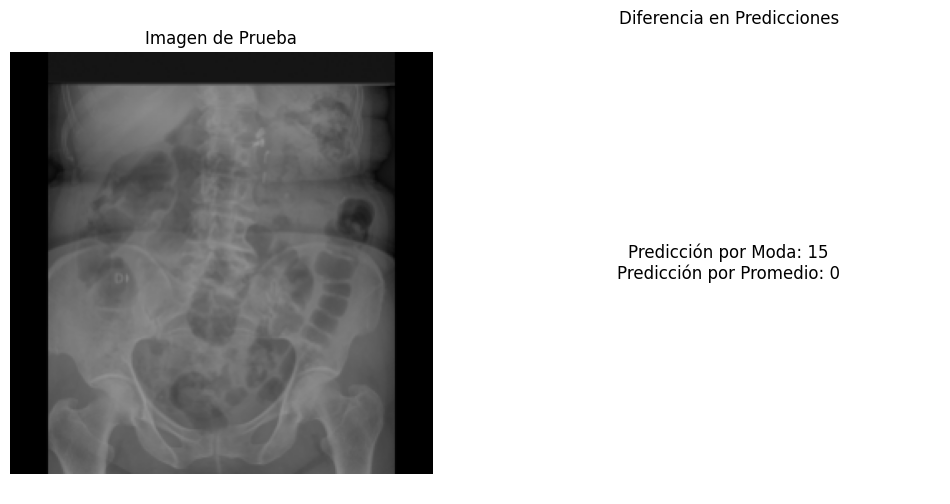

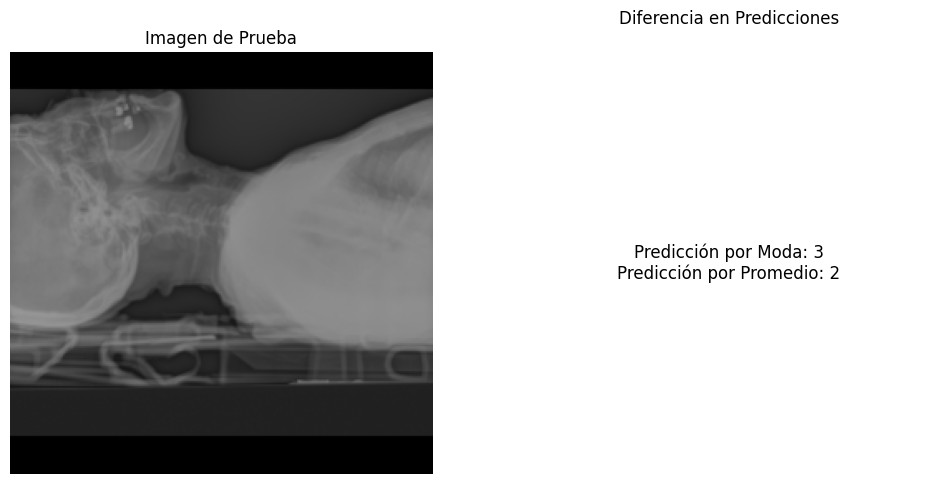

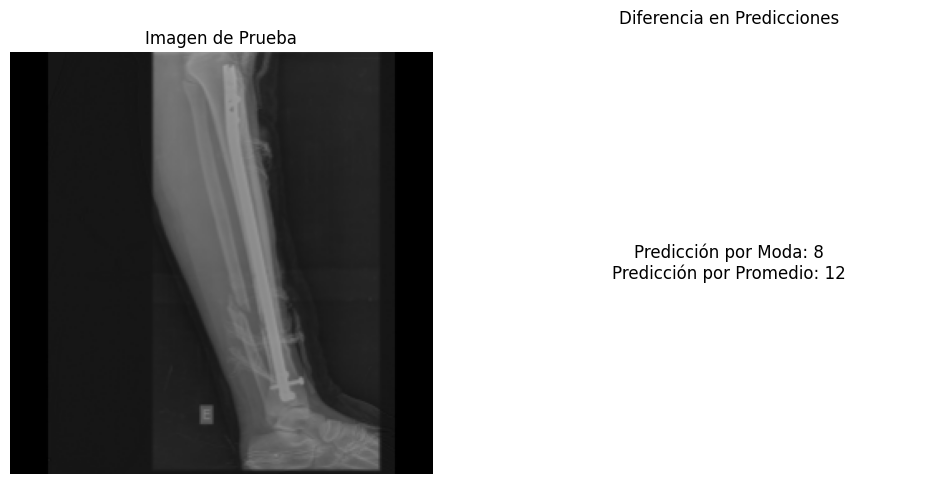

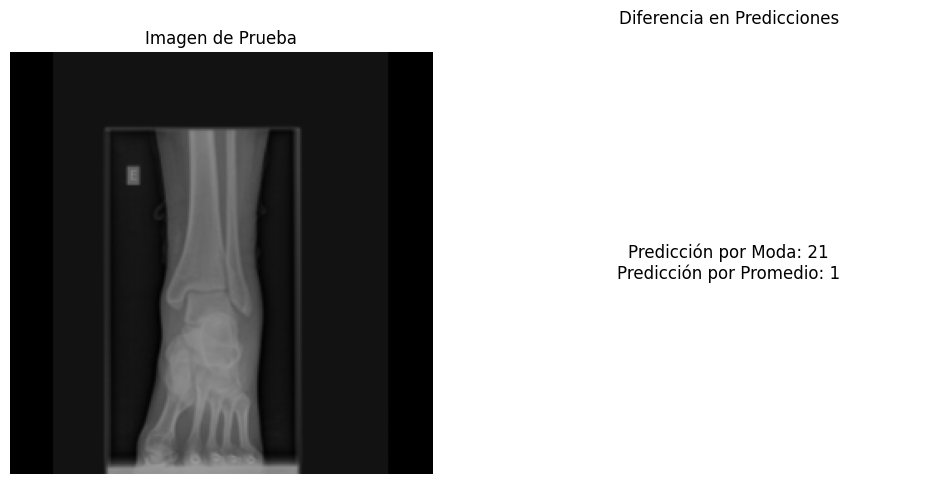

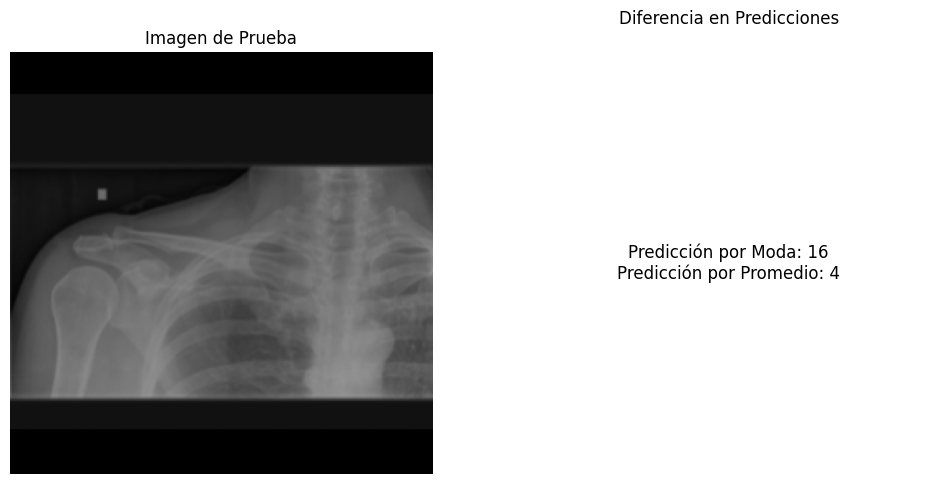

In [ ]:
# Comparar las predicciones
son_iguales = np.array_equal(ensemble_pred_val_class, ensemble_pred_class)
print("¿Son iguales las predicciones por moda y por promedio?", son_iguales)

# Encontrar los índices donde las predicciones difieren
indices_diferentes = np.where(ensemble_pred_val_class != ensemble_pred_class)[0]

print("Índices con predicciones diferentes:", indices_diferentes)

# Desnormalizar las imágenes para visualización
def denormalize_image(image):
    image = (image + 1) * 0.5  # Rango [0, 1]
    image = (image * 255).astype(np.uint8)  # Rango [0, 255]
    return image

# Visualizar las imágenes y las predicciones donde difieren
def visualize_differences(images, pred_val, pred_avg, indices):
    for i in indices:
        plt.figure(figsize=(12, 6))

        # Mostrar la imagen
        plt.subplot(1, 2, 1)
        plt.imshow(denormalize_image(images[i]))
        plt.title("Imagen de Prueba")
        plt.axis('off')

        # Mostrar las predicciones en texto
        plt.subplot(1, 2, 2)
        pred_text = f"Predicción por Moda: {pred_val[i]}\nPredicción por Promedio: {pred_avg[i]}"

        plt.text(0.5, 0.5, pred_text, fontsize=12, ha='center', va='center')
        plt.title("Diferencia en Predicciones")
        plt.axis('off')

        plt.show()

# Asumir que test_images es el array de imágenes de prueba procesadas

# Visualizar las diferencias
visualize_differences(test_images, ensemble_pred_val_class, ensemble_pred_class, indices_diferentes)


In [ ]:
ensemble_pred_class

array([ 3, 11, 11,  2,  3,  3,  3,  4,  6,  8,  0,  3, 21,  3,  3,  3,  3,
        0,  3,  7,  9,  3, 20,  5, 14, 21,  0,  3, 21, 17,  3,  3,  3,  3,
        3,  3,  6, 17,  3,  1,  3,  0, 15,  3, 18, 16, 15, 13,  3,  3,  3,
        2, 10, 13,  3, 21,  3,  3,  3,  6,  3, 20,  3,  1,  3,  3,  0, 18,
        3,  3, 14,  3,  3, 15,  0,  3,  3,  3,  3, 11,  3,  3,  6,  3, 14,
        3, 11,  3,  6, 11, 14,  3,  3,  3,  3, 13, 15,  9, 13,  3,  3,  4,
       14,  3, 11,  3,  3,  0, 21,  6, 14,  2,  3,  2,  3,  3, 10, 11,  3,
        3, 14,  2,  3,  3,  3,  3,  3,  9, 13, 15,  5, 14,  3,  3, 12,  3,
        1,  3, 13,  2,  0,  3,  3,  1, 11, 11, 15, 12, 14, 12,  5, 14, 11,
        2, 12, 14, 16,  3,  3,  3, 14,  3,  2,  3,  0, 10, 11, 11, 14,  3,
        9, 14, 15,  3,  3,  3, 14,  2, 15, 11,  3,  9,  3,  3,  3,  1,  3,
       16, 14,  3, 11, 14,  2,  3,  3,  2,  3, 21, 11, 12,  3,  9,  3,  3,
       15,  1, 14,  3, 21,  3,  3,  2,  6,  3,  6,  3,  9,  3,  3, 21,  3,
        6,  3,  3,  3,  3

In [ ]:
ensemble_pred_val_class

array([ 3, 11, 11,  2,  3,  3,  3,  4,  6,  8,  0,  3, 21,  3,  3,  3,  3,
        0,  3,  7,  9,  3, 20,  5, 14, 21,  0,  3, 21, 17,  3,  3,  3,  3,
        3,  3,  6, 17,  3,  1,  3,  0, 15,  3, 18, 16, 15, 13,  3,  3,  3,
        2, 19, 13,  3, 21,  3,  3,  3,  6,  3, 20,  3,  1,  3,  3,  0, 18,
        3,  3, 14,  3,  3, 15,  0,  3,  3,  3,  3, 11,  3,  3,  6,  3, 14,
        3, 11,  3,  6, 11, 14,  3,  3,  3,  3, 13, 15,  9, 13,  3,  3,  4,
       14,  3, 11,  3,  3,  0, 21,  6, 14,  2,  3,  2,  3,  3, 10, 11,  3,
        3, 14,  2,  3,  3,  3,  3,  3,  9, 14, 15,  5, 14,  3,  3, 12,  3,
        1,  3, 13,  2,  0,  3,  3,  1, 11, 11, 15, 12, 14, 12,  5, 14, 11,
        2, 12, 14, 16,  3,  3,  3, 14,  3,  2,  3,  0, 10, 11, 11, 14,  3,
        9, 14, 15,  3,  3,  3, 14,  2, 15, 11,  3,  9,  3,  3,  3,  1,  3,
       16, 14,  3, 11, 14,  2,  3,  3,  2,  3, 21, 11, 12,  3,  9,  3,  3,
       15, 21, 14,  3, 21,  3,  3,  2,  6,  3,  6,  3,  9,  3,  3, 21,  3,
        6,  3,  3,  3,  3

Votacion por mayoria

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy
accuracy = accuracy_score(test_labels, ensemble_pred_class)
print(f'Ensemble Accuracy: {accuracy:.4f}')

# Print a detailed classification report
print(classification_report(ensemble_pred_class,test_labels))


Ensemble Accuracy: 0.0518
              precision    recall  f1-score   support

           0       0.05      1.00      0.10        17
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00       144
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         7
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        14
          16       0.00      0.00      0.00         8
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Votacion por media

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate the accuracy
accuracy = accuracy_score(test_labels, ensemble_pred_val_class)
print(f'Ensemble Accuracy: {accuracy:.4f}')

# Print a detailed classification report
print(classification_report(ensemble_pred_val_class,test_labels))


Ensemble Accuracy: 0.0488
              precision    recall  f1-score   support

           0       0.05      1.00      0.09        16
           1       0.00      0.00      0.00         8
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00       147
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00        13
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00        26
          15       0.00      0.00      0.00        15
          16       0.00      0.00      0.00         8
 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Lanzamiento de predicciones

In [ ]:
# Paso 7: Generación del archivo de envío
submission_df = pd.DataFrame({'SOPInstanceUID': test_df['SOPInstanceUID'], 'Target': ensemble_pred_class})
submission_df.to_csv('zp.csv', index=False)